In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'RDpcTXlQcm9qZWN0c1xtYWNyby1zdHVkeS1ibG9nXHBvc3RzXDIwMjUtMTAtMjEtbGUtbnItcmJjLXZmaQ=='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"C:\\Users\\TYB\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\importlib\\_bootstrap.py": 1744098328.0, "C:\\Users\\TYB\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\importlib\\_bootstrap_external.py": 1744098328.0, "C:\\Users\\TYB\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\zipimport.py": 1744098328.0, "C:\\Users\\TYB\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\codecs.py": 1744098328.0, "C:\\Users\\TYB\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\encodings\\aliases.py": 1744098328.0, "C:\\Users\\TYB\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\encodings\\__init__.py": 1744098328.0, "C:\\Users\\TYB\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\encodings\\utf_8.py": 1744098328.0, "C:\\Users\\TYB\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\encodings\\gbk.py": 1744098328.0, "C:\\Users\\TYB\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\abc.py": 1744098328.0, "C:\\Users\\TYB\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\io.py": 17440

In [2]:
#| warning: false

# %%
import numpy as np
import types
from quantecon.markov import tauchen
from scipy.interpolate import interp1d
from scipy.optimize import minimize
import time
import matplotlib.pyplot as plt

# %%
#----------------------------------------------------------------
# 1. Calibration: Parameters and Steady States
#----------------------------------------------------------------
P = types.SimpleNamespace() # Parameters
SS = types.SimpleNamespace() # Steady states
G = types.SimpleNamespace()  # Grids

# Technology
P.aalpha = 0.3
P.bbeta  = 0.991
P.ddelta = 0.0196

# Preference parameters
P.ggamma = 5

# Productivity shocks
P.llambda = 0.95
P.ssigma  = 0.007

# Compute Steady State values
SS.lss = 1/3
SS.kss = ((1-P.bbeta*(1-P.ddelta))/(P.aalpha*P.bbeta))**(1/(P.aalpha-1)) * SS.lss
SS.css = (SS.kss**P.aalpha)*(SS.lss**(1-P.aalpha)) - P.ddelta*SS.kss
P.nnu  = SS.css/((1-P.aalpha)*SS.kss**P.aalpha*SS.lss**(-P.aalpha)*(1-SS.lss)+SS.css)
SS.vss = ((SS.css**P.nnu*(1-SS.lss)**(1-P.nnu))**(1-P.ggamma))/(1-P.ggamma)/(1-P.bbeta)

# %%
#----------------------------------------------------------------
# 1a. Define utility function and production function
#----------------------------------------------------------------

def u(c, l):

    return ((c**P.nnu)*(1-l)**(1-P.nnu))**(1-P.ggamma)/(1-P.ggamma)

def f(k, l, z):

    return np.exp(z) * (k**P.aalpha) * (l**(1-P.aalpha))

# %%
#----------------------------------------------------------------
# 2. Declare size vectors for grids
#----------------------------------------------------------------

# Define boundaries for capital
# consider the state space of 90% to 190% capital
pRange_k_grid = 0.9;        
G.k_min = (1-pRange_k_grid)*SS.kss
G.k_max = (1+pRange_k_grid)*SS.kss
G.k_pts = 41

G.k_grid  = np.linspace(G.k_min,G.k_max,G.k_pts)
G.k_dim = len(G.k_grid)

# Productivity
G.z_dim = 5    # number of nodes for technology process Z

# %%
#----------------------------------------------------------------
# 3. Tauchen 
#----------------------------------------------------------------

# find grid points and transition matrix using Tauchen's method
mc = tauchen(G.z_dim, P.llambda, P.ssigma, mu=0)
G.Z = mc.state_values
G.PI = mc.P

# size of state grids (the structure of solutions)
G.s_grid = np.ones((G.k_dim, G.z_dim))

# initialize guess solution for value function
v_guess = np.ones_like(G.s_grid)

# storage for value function and policy function
maxIteration = 2000
v_history = np.zeros((maxIteration, G.k_dim, G.z_dim))
c_policy_history = np.zeros((maxIteration, G.k_dim, G.z_dim))
l_policy_history = np.zeros((maxIteration, G.k_dim, G.z_dim))

# %%
#----------------------------------------------------------------
# 3a. Define functions for value function iteration
#----------------------------------------------------------------

# expected value function of k_prime
def create_expected_value_interpolator(z_index, v_old):
    """
    This is a factory function.
    Its job is to create and return a callable function that computes the expected value.

    Parameters:
    z_index (int): The index of the current technology state z.
    v_old (np.ndarray): The complete (k_dim, z_dim) value function array.
    G: An object containing grids and the transition matrix.

    Returns:
    callable: A function that takes only k_prime as an argument.
    """

    # 1. One-time setup: create 5 one-dimensional interpolation function objects.
    #    We store these 5 functions in a list.
    interpolators = []
    for j in range(G.z_dim):
        v_k_given_z_j = v_old[:, j]
        # Create and store the callable interp1d function object
        f_interp = interp1d(G.k_grid, v_k_given_z_j,
                              kind='cubic',
                              bounds_error = False,
                              fill_value= "extrapolate") 
        interpolators.append(f_interp)

    # 2. Get the one-time transition probabilities
    transition_probs = G.PI[z_index, :]

    # 3. Define and return the inner function (this is the callable object we need)
    def expected_value_func(k_prime):
        """
        This function calculates E[V(k', z') | z].
        It can access 'interpolators' and 'transition_probs' defined in its outer scope.
        This is a "closure".
        """
        future_values = np.array([interp(k_prime) for interp in interpolators])
        return np.dot(transition_probs, future_values)

    # The factory function returns this inner function
    return expected_value_func

# right hand side of Bellman equation
def bellman_rhs_for_optimizer(controls, states, expected_value_func):

    c, l = controls
    k, z = states
    k_prime = f(k, l, z) + (1 - P.ddelta) * k - c
    return u(c, l) + P.bbeta * expected_value_func(k_prime)

# Bellman operator
def T(v_old):

    v_new = np.zeros_like(v_old)
    c_policy = np.zeros_like(v_old)
    l_policy = np.zeros_like(v_old)

    expected_value_funcs = []
    for j in range(G.z_dim):
        expected_value_funcs.append(create_expected_value_interpolator(j, v_old))

    for k_index, k_val in enumerate(G.k_grid):
        for z_index, z_val in enumerate(G.Z):

            states = (k_val, z_val)

            # Bounds: C > 0, 0 <= L <= 1
            bounds = [(1e-10, None), (1e-10, 1.0 - 1e-10)]

            # Inequality Constraint: C <= f(k,l,z) + (1-δ)k
            def inequality_constraint(controls, k, z):
                c, l = controls
                resources = f(k, l, z) + (1 - P.ddelta) * k
                return resources - c

            # Package the constraint into the dictionary format required by scipy
            constraints = [{
                'type': 'ineq',  # 'ineq' stands for an inequality constraint (>= 0)
                'fun': inequality_constraint,
                'args': (k_val, z_val) # Pass the current states k, z as extra arguments
            }]

           # Use a safe, guaranteed feasible guess
            available_resources = f(k_val, SS.lss, z_val) + (1 - P.ddelta) * k_val
            c_guess = 0.5 * available_resources
            l_guess = SS.lss
            initial_guess = [c_guess, l_guess]

            # Define the optimization objective function
            objective_func = lambda controls: -bellman_rhs_for_optimizer(controls, states, expected_value_funcs[z_index])

            # Call the minimize function
            result = minimize(
                fun=objective_func,
                x0=initial_guess,
                args=(),  # objective_func is a lambda closure, no extra args needed
                method='SLSQP',
                bounds=bounds,
                constraints=constraints
            )

            # Save the results
            if result.success:
                v_new[k_index, z_index] = -result.fun
                c_policy[k_index, z_index] = result.x[0]
                l_policy[k_index, z_index] = result.x[1]
            else:
                # If optimization fails, we can set a flag value and print a warning
                v_new[k_index, z_index] = -1e10 # or other penalty value
                print(f"Warning: Optimization failed at (k={k_val:.2f}, z={z_val:.2f}): {result.message}")

    return v_new, c_policy, l_policy

# %%
#----------------------------------------------------------------
# 4. Iteration
#----------------------------------------------------------------

tol = 1e-4
error = tol + 1
v_old = v_guess

i = 0
while error > tol and i < maxIteration:

    v_new, c_policy, l_policy = T(v_old)
    error = np.max(np.abs(v_new - v_old))

    v_history[i] = v_new
    c_policy_history[i] = c_policy
    l_policy_history[i] = l_policy

    i = i + 1
    v_old = v_new
    if i % 100 == 0:
        print(f"Error at iteration {i} is {error}.")

if error > tol:
    print("Failed to converge!")
else:
    print(f"\nConverged in {i} iterations.")

C:\Users\TYB\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\optimize\_slsqp_py.py:435: RuntimeWarning:

Values in x were outside bounds during a minimize step, clipping to bounds

C:\Users\TYB\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\optimize\_slsqp_py.py:439: RuntimeWarning:

Values in x were outside bounds during a minimize step, clipping to bounds

C:\Users\TYB\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\optimize\_slsqp_py.py:499: RuntimeWarning:

Values in x were outside bounds during a minimize step, clipping to bounds



Error at iteration 100 is 0.5953695926179279.


Error at iteration 200 is 0.2193158441076264.


Error at iteration 300 is 0.08708788833962444.


Error at iteration 400 is 0.03508558539655837.


Error at iteration 500 is 0.014186488775521866.


Error at iteration 600 is 0.0057421378954103375.


Error at iteration 700 is 0.0023247882974146705.


Error at iteration 800 is 0.0009413874808359424.


Error at iteration 900 is 0.00038117918245461624.


Error at iteration 1000 is 0.00015441325490428426.



Converged in 1049 iterations.


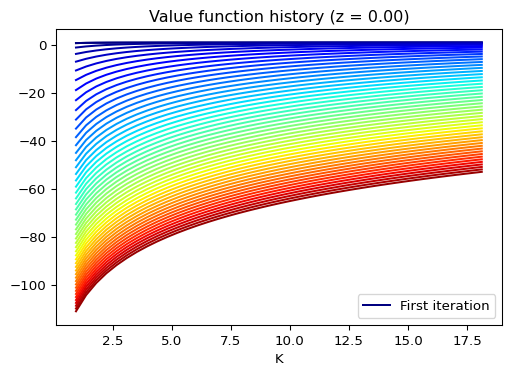

In [3]:
# %%
# value function

z_steady_state_index = 2
start = 0   # 任意整数起点
step = 2  # 步长
count = 50  # 前进次数

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(G.k_grid, v_history[0, :, z_steady_state_index], color=plt.cm.jet(0), label='First iteration')
for j in range(start, start + step * count, step):

    v_function_slice = v_history[j, :, z_steady_state_index]

    ax.plot(G.k_grid, v_function_slice, color=plt.cm.jet((j-start)/(step*count)))

ax.set_title(fr'Value function history (z = {G.Z[z_steady_state_index]:.2f})')
ax.set_xlabel('K')
ax.legend()
plt.show()

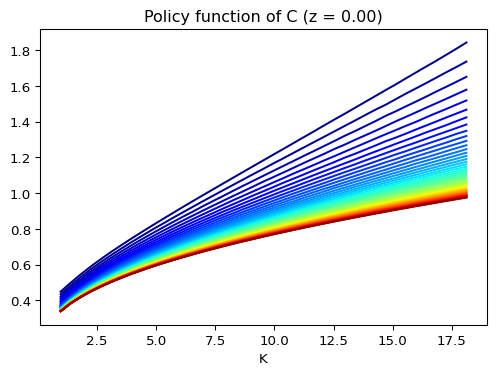

In [4]:
# %%
# policy function for consumption

z_steady_state_index = 2
start = 10   # 任意整数起点
step = 1  # 步长
count = 50  # 前进次数

fig, ax = plt.subplots(figsize=(6, 4))

for j in range(start, start + step * count, step):

    c_function_slice = c_policy_history[j, :, z_steady_state_index]

    ax.plot(G.k_grid, c_function_slice, color=plt.cm.jet((j-start)/(step*count)))

ax.set_title(fr'Policy function of C (z = {G.Z[z_steady_state_index]:.2f})')
ax.set_xlabel('K')
plt.show()

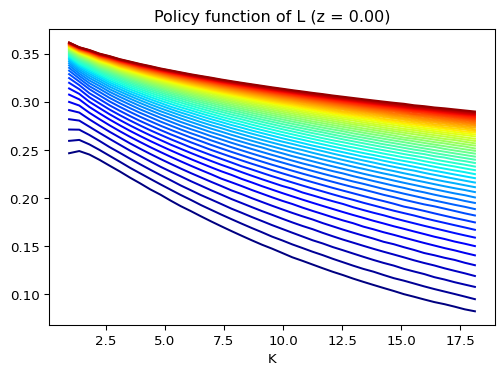

In [5]:
# %%
# policy function for labor

z_steady_state_index = 2
start = 10   # 任意整数起点
step = 1  # 步长
count = 50  # 前进次数

fig, ax = plt.subplots(figsize=(6, 4))

for j in range(start, start + step * count, step):

    l_function_slice = l_policy_history[j, :, z_steady_state_index]

    ax.plot(G.k_grid, l_function_slice, color=plt.cm.jet((j-start)/(step*count)))

ax.set_title(fr'Policy function of L (z = {G.Z[z_steady_state_index]:.2f})')
ax.set_xlabel('K')
plt.show()

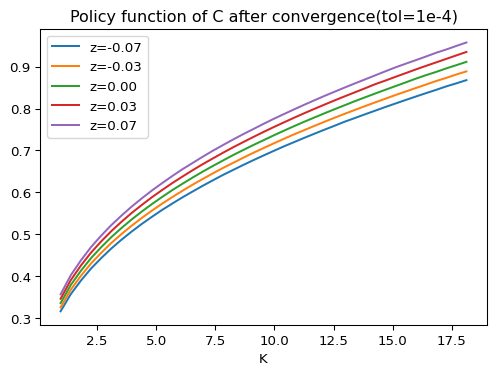

In [6]:
# %%
fig, ax = plt.subplots(figsize=(6, 4))

for j in range(0, G.z_dim):

    c_function_slice = c_policy_history[i-1, :, j]
    ax.plot(G.k_grid, c_function_slice, label=fr'z={G.Z[j]:.2f}')

ax.set_title('Policy function of C after convergence(tol=1e-4)')
ax.set_xlabel('K')
ax.legend()
plt.show()

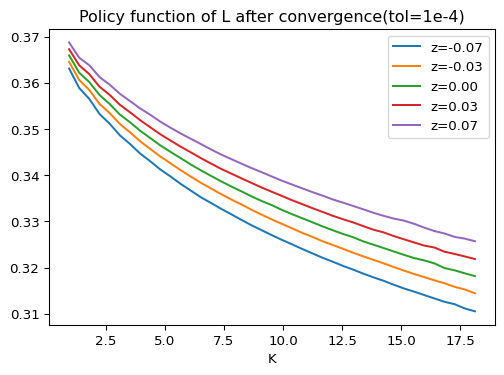

In [7]:
# %%
fig, ax = plt.subplots(figsize=(6, 4))

for j in range(0, G.z_dim):

    l_function_slice = l_policy_history[i-1, :, j]
    ax.plot(G.k_grid, l_function_slice, label=fr'z={G.Z[j]:.2f}')

ax.set_title('Policy function of L after convergence(tol=1e-4)')
ax.set_xlabel('K')
ax.legend()
plt.show()